In [18]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from modules_v2 import convert_qu2_equ_bqu as qeq
from modules_v2 import aliasing_correction as ac
from modules_v2 import return_kernels as retker
%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
nsideout=8

lmax=3*nsideout ; sampling=3000
theta,pl2=rk.get_plm0(lmax,sampling,theta_max=pi)
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,theta,pl2)

lon=120. ; lat=0.
cpix=h.ang2pix(nsideout,lon,lat,lonlat=True)
print cpix,h.pix2ang(nsideout,cpix,lonlat=True)

npix=h.nside2npix(nsideout)
t=zeros(npix,float) ; mask=zeros(npix,float)
q=zeros(npix,float) ; u=zeros(npix,float)

t[cpix]=1. ; mask[cpix]=1.
q[cpix]=1. ; u[cpix]=0.

378 (118.125, 0.0)


In [41]:
tqu=[t,q,u]
alm_tqu=h.map2alm(tqu,lmax=lmax,pol=True,iter=0)
bltqu=h.alm2map([alm_tqu[0],alm_tqu[1],alm_tqu[2]],nside=nsideout,pol=True)
acrtqu=ac.delta_radiate(q,u,pi,theta,rad_ker_i)
acctqu=ac.delta_convolve(q,u,pi,theta,rad_ker_i)
temp,iker=retker.return_I_kernel_radiate(nsideout,lon,lat,pi,theta,rad_ker_i,normalize=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


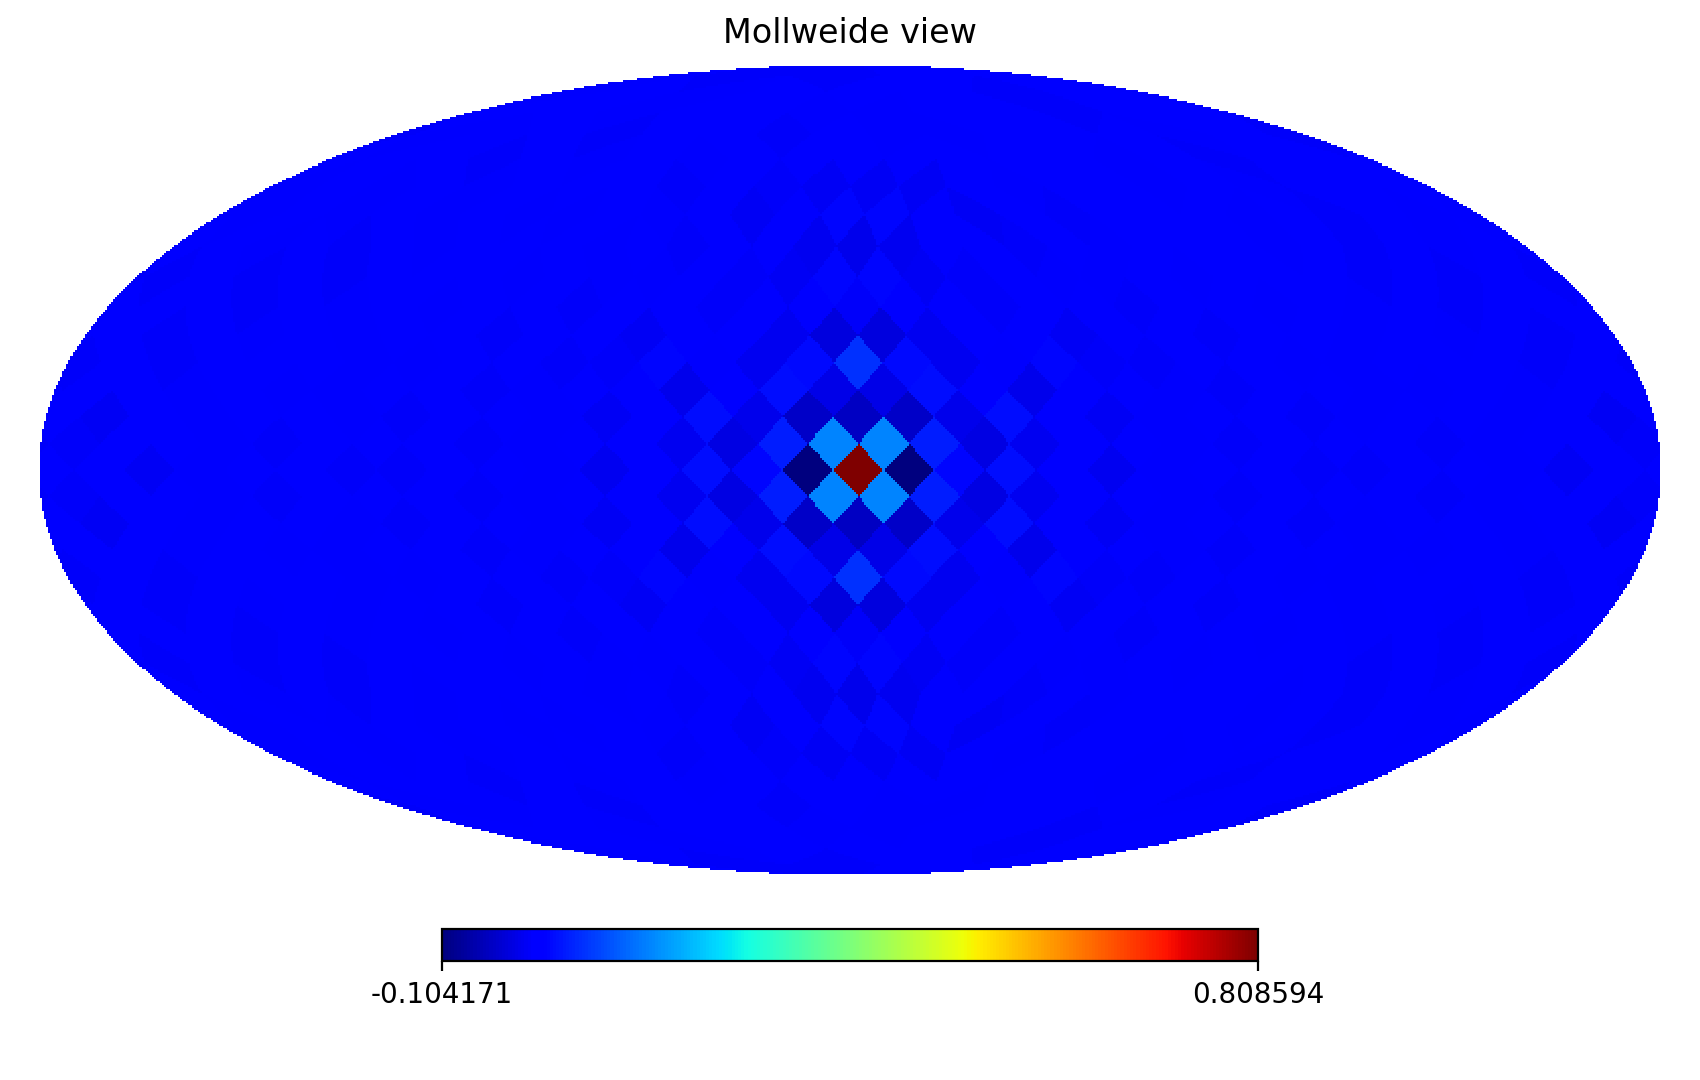

<IPython.core.display.Javascript object>


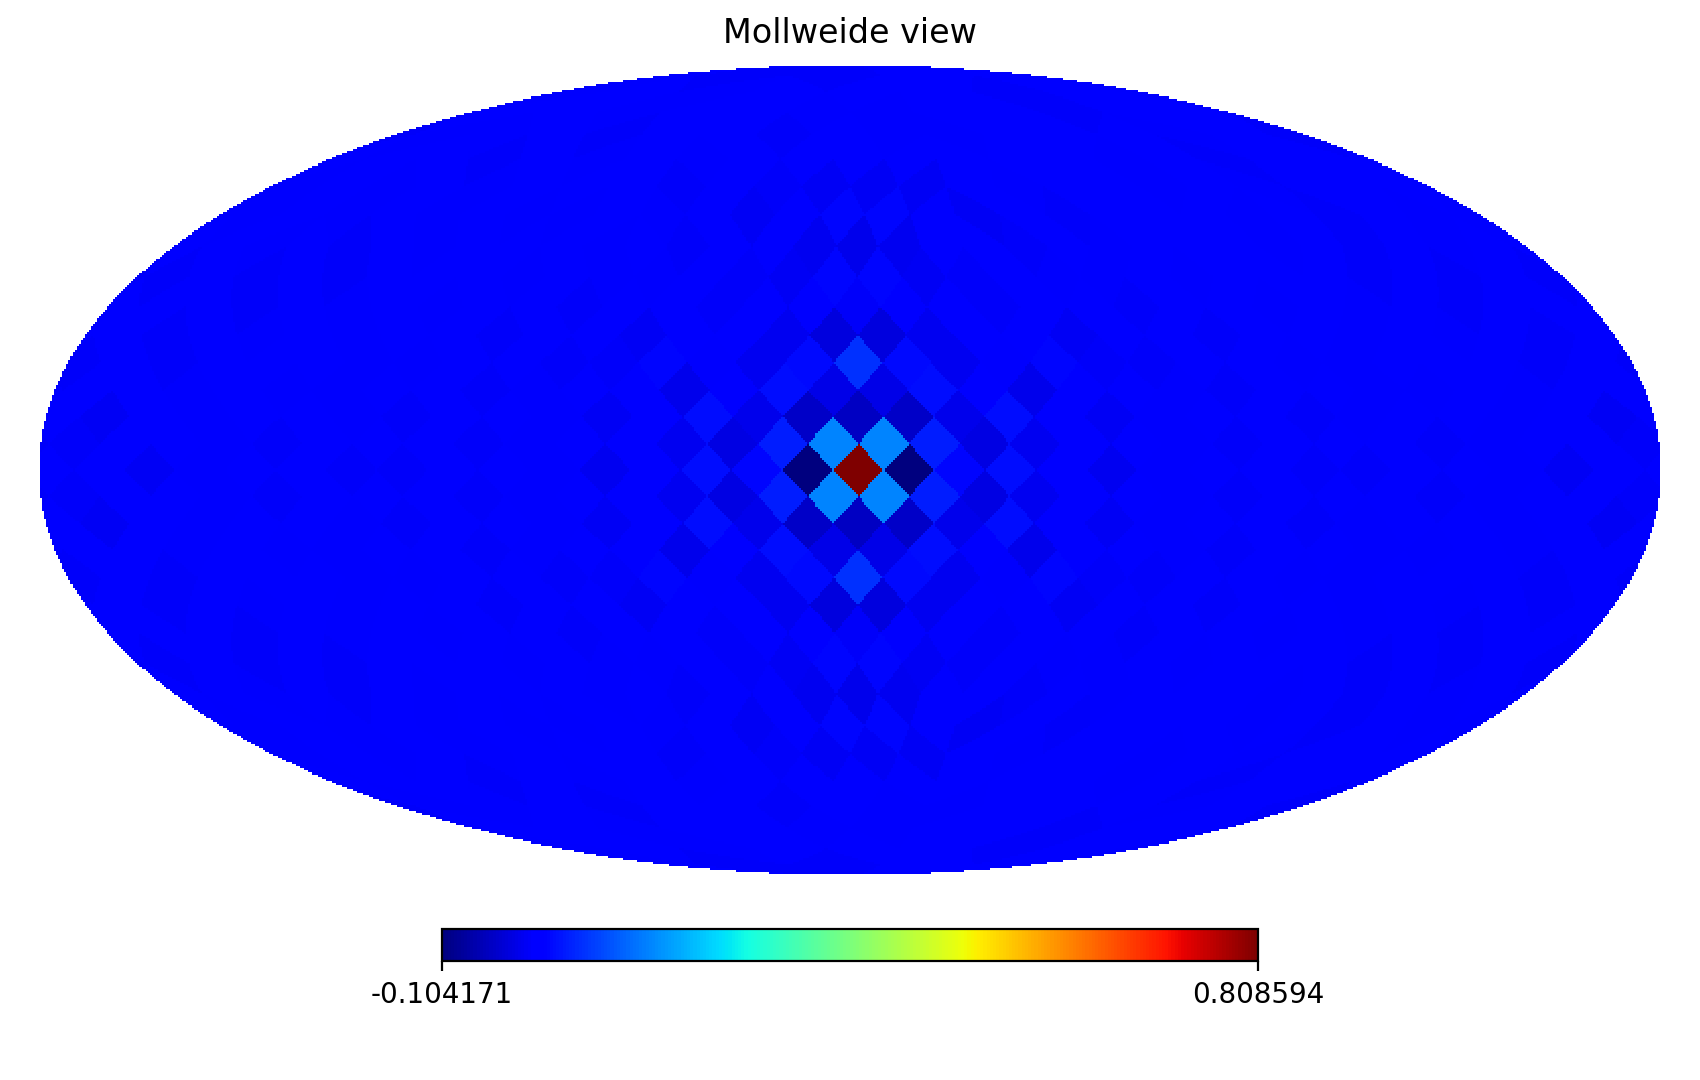

<IPython.core.display.Javascript object>


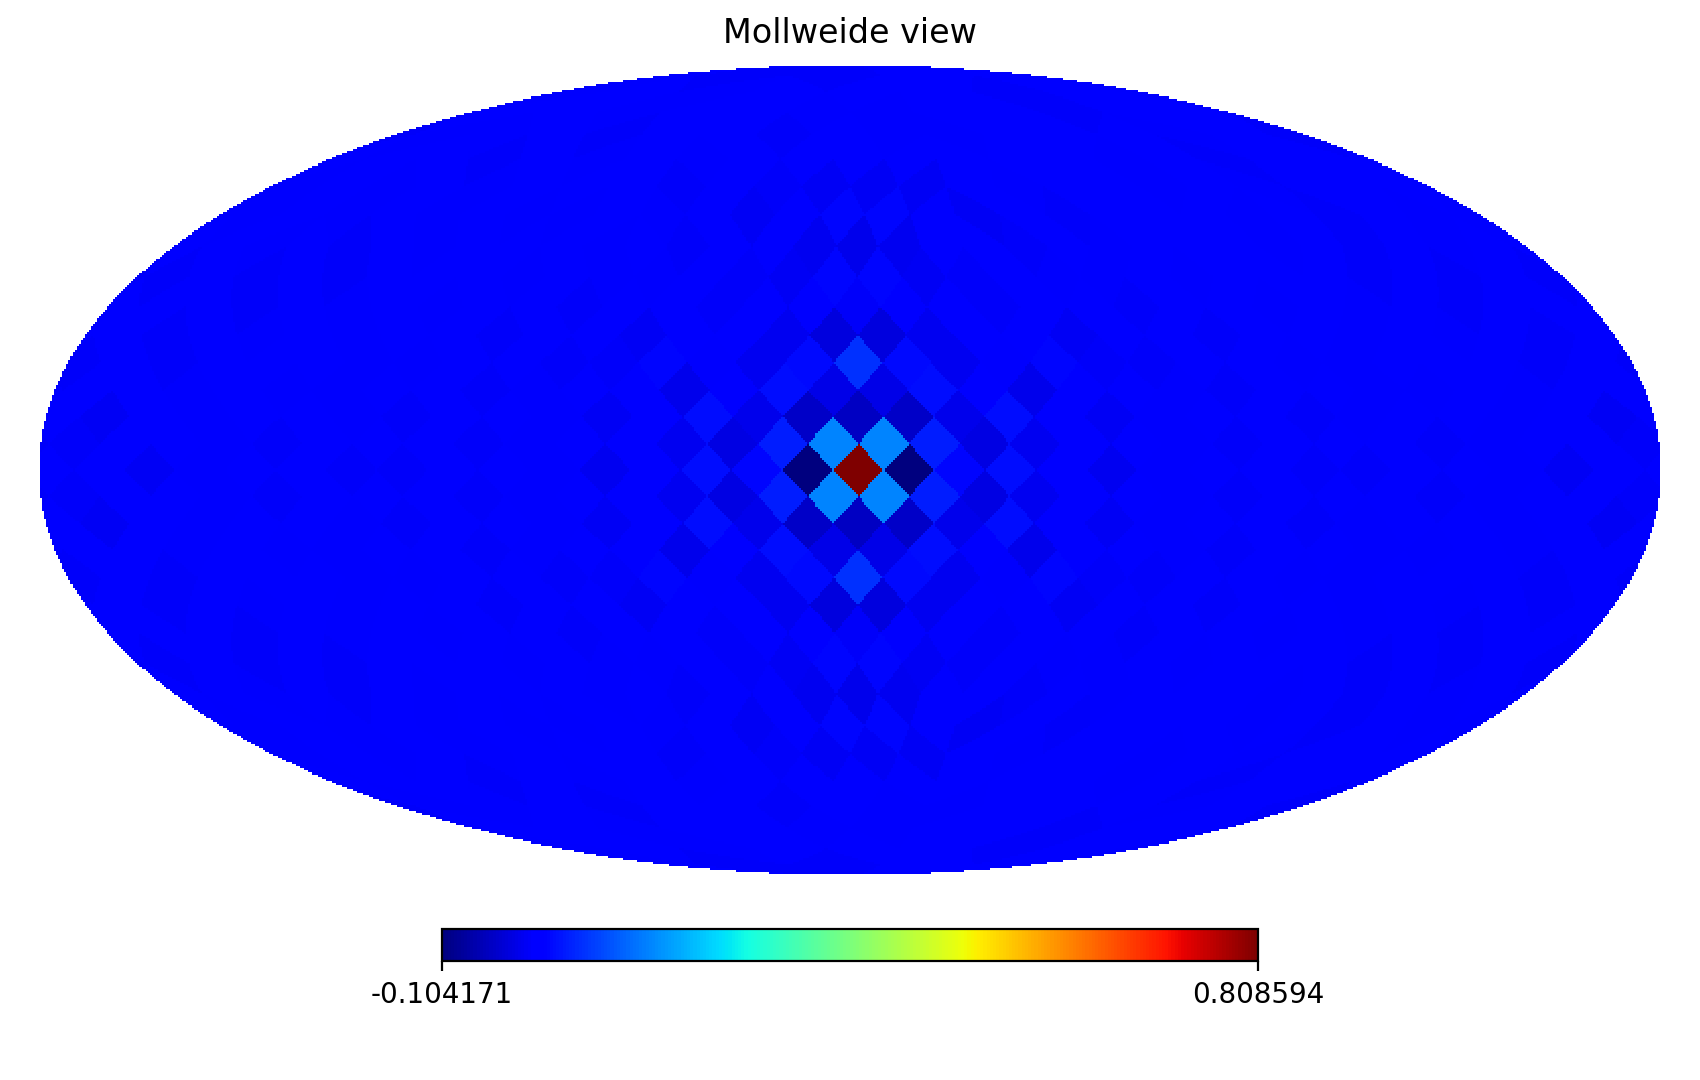

<IPython.core.display.Javascript object>


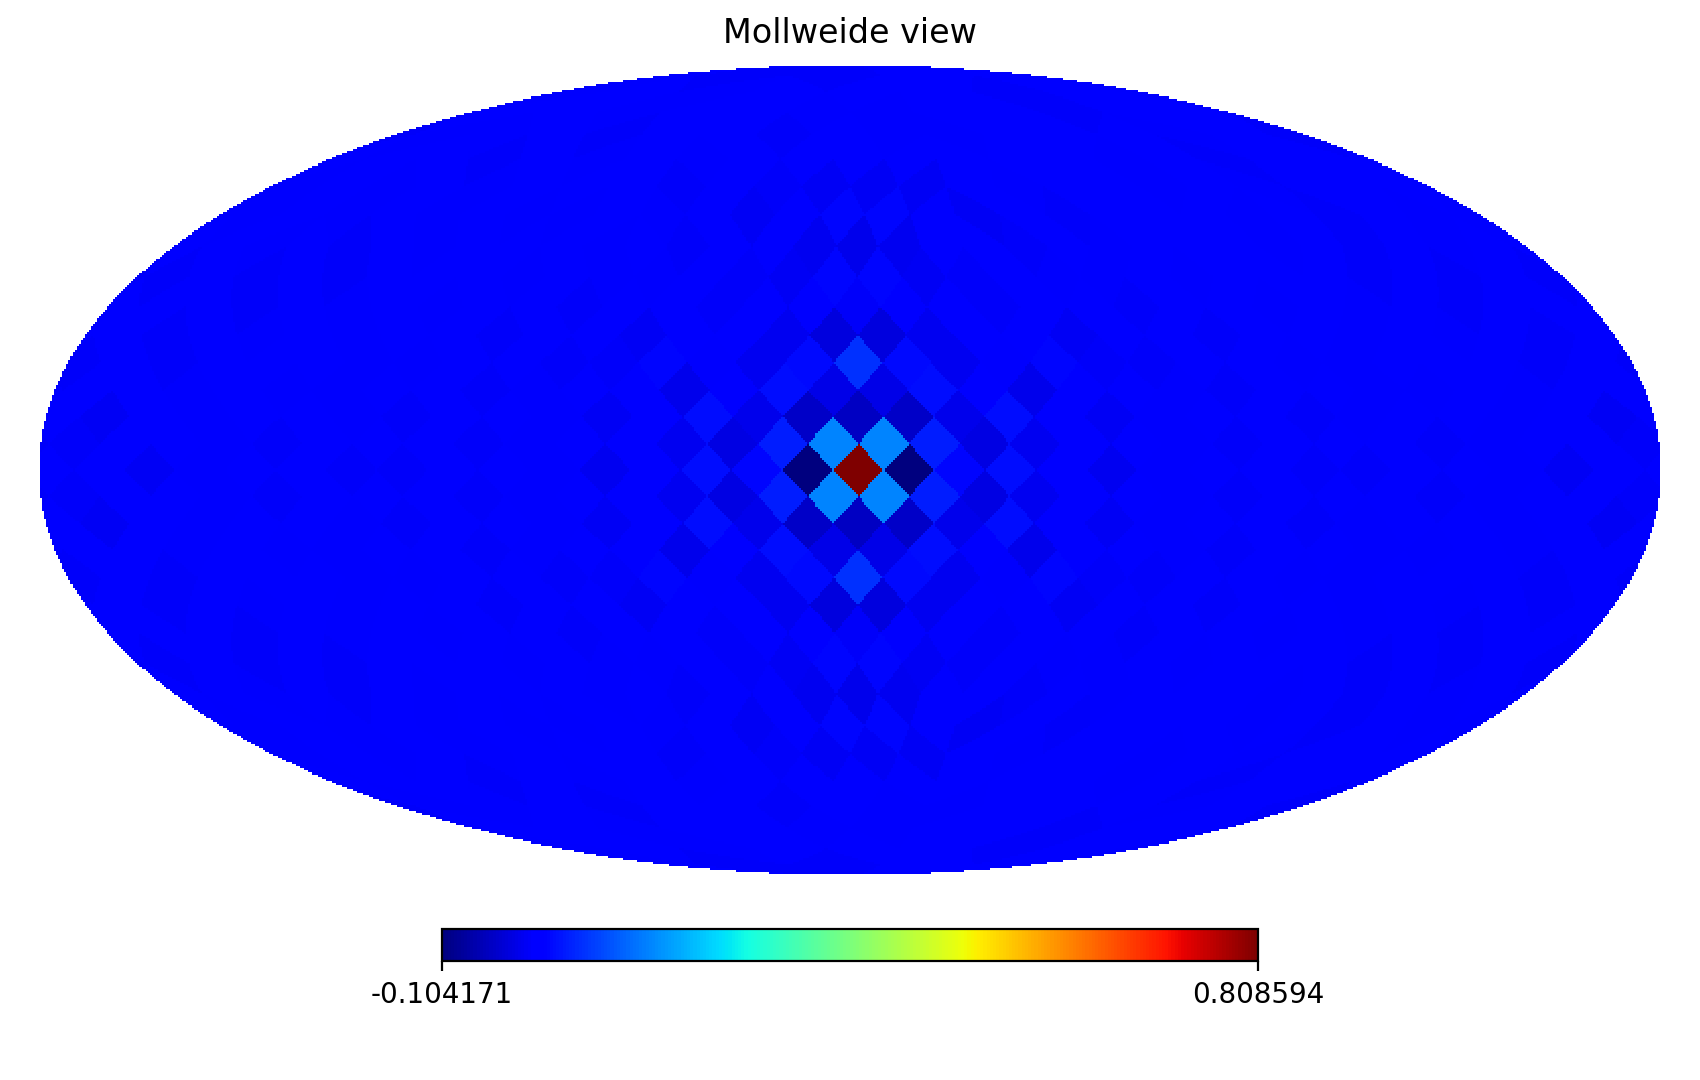

In [42]:
h.mollview(acrtqu[0],rot=(lon,lat))
h.mollview(acctqu[0],rot=(lon,lat))
h.mollview(bltqu[1],rot=(lon,lat))
h.mollview(iker[0],rot=(lon,lat))

<IPython.core.display.Javascript object>


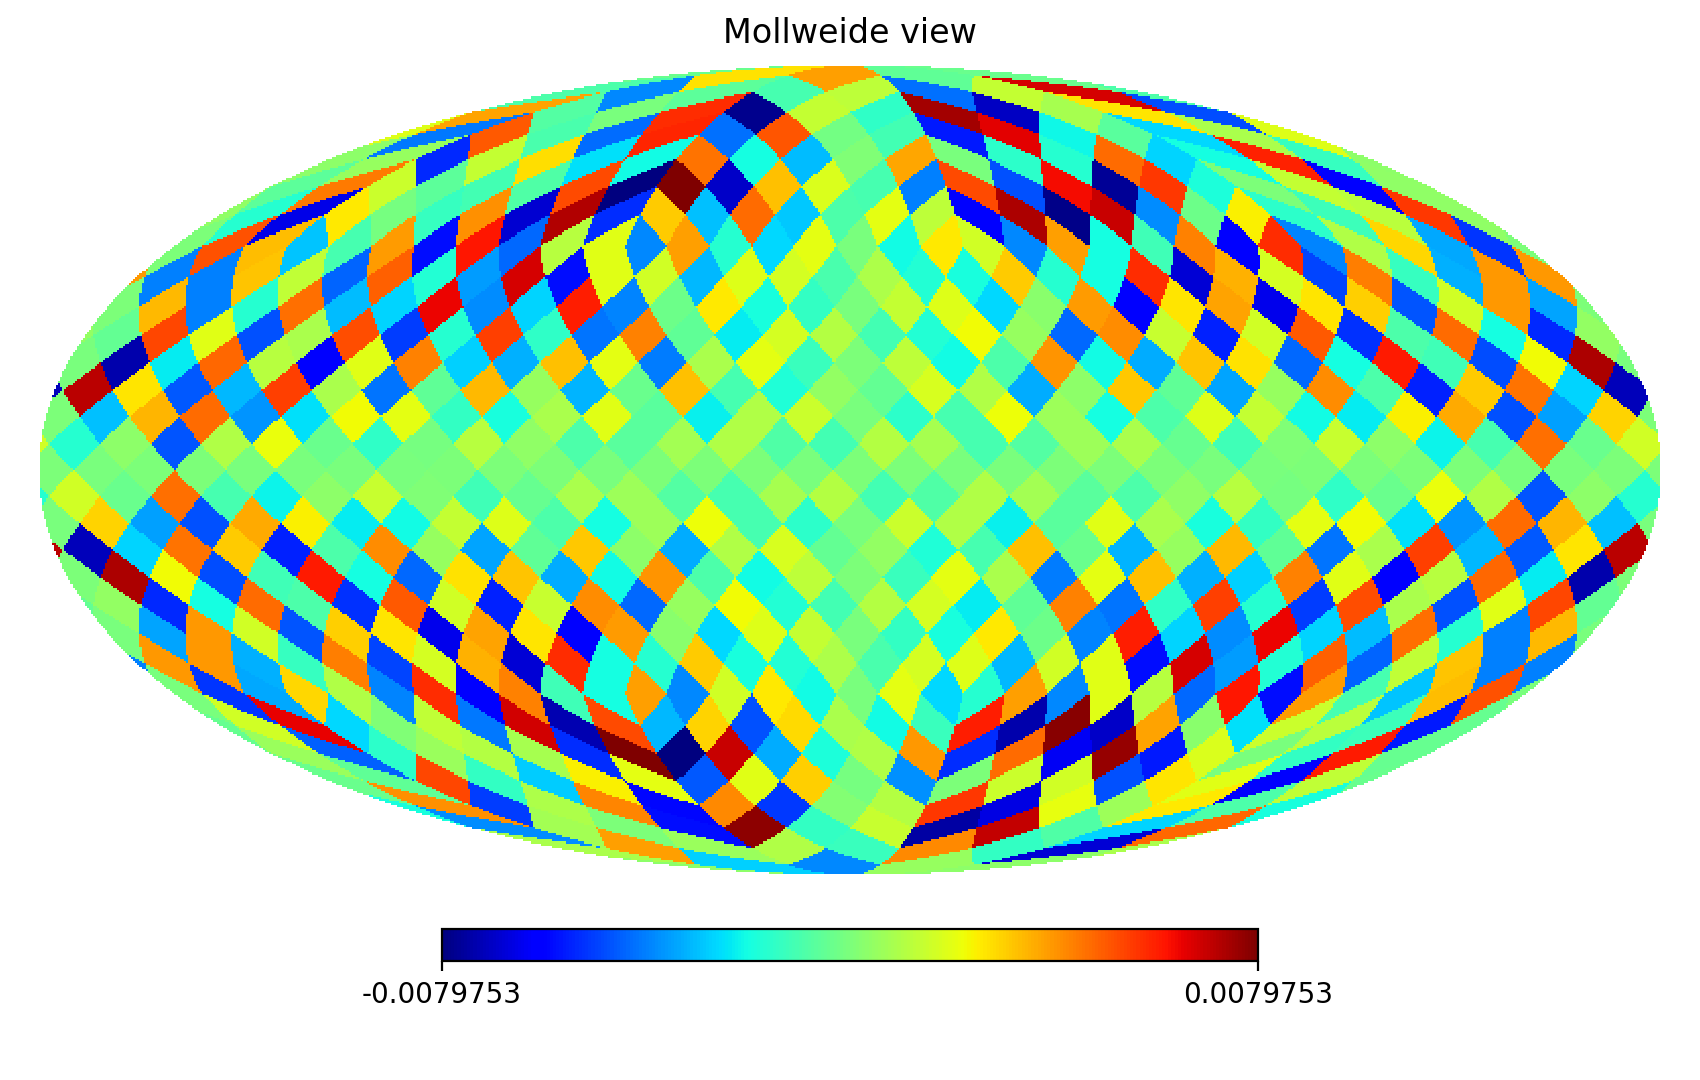

<IPython.core.display.Javascript object>


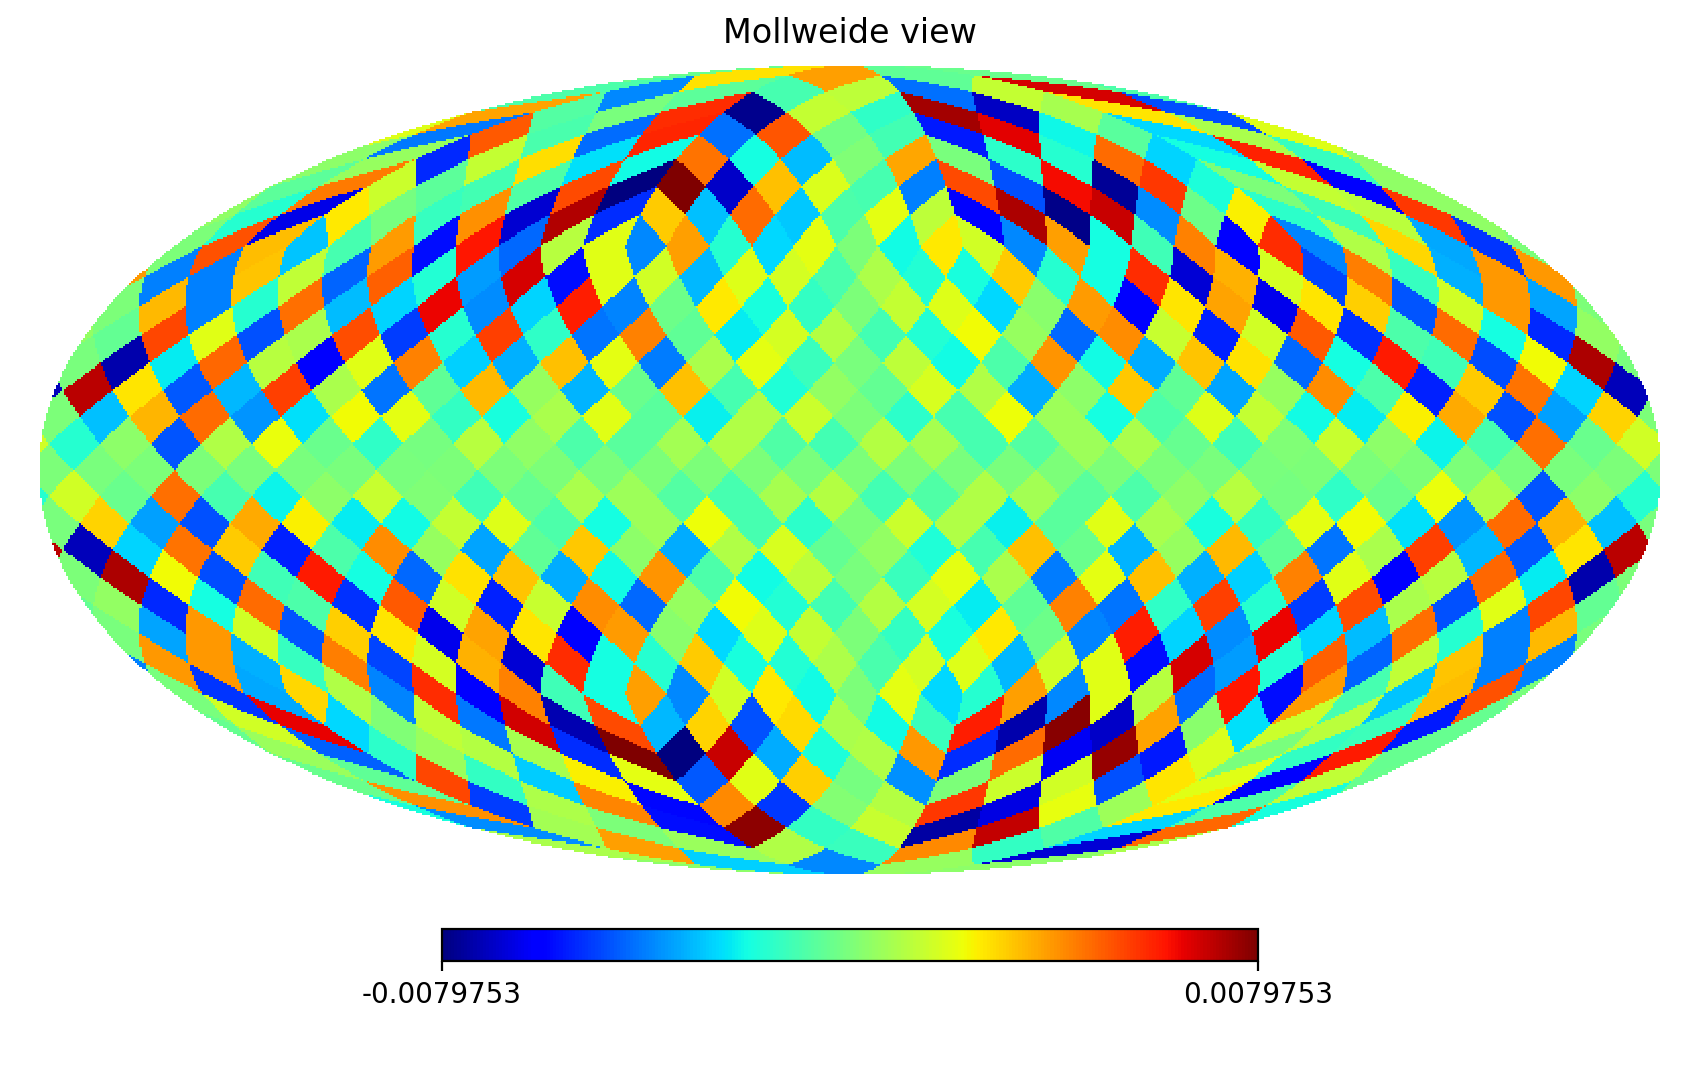

<IPython.core.display.Javascript object>


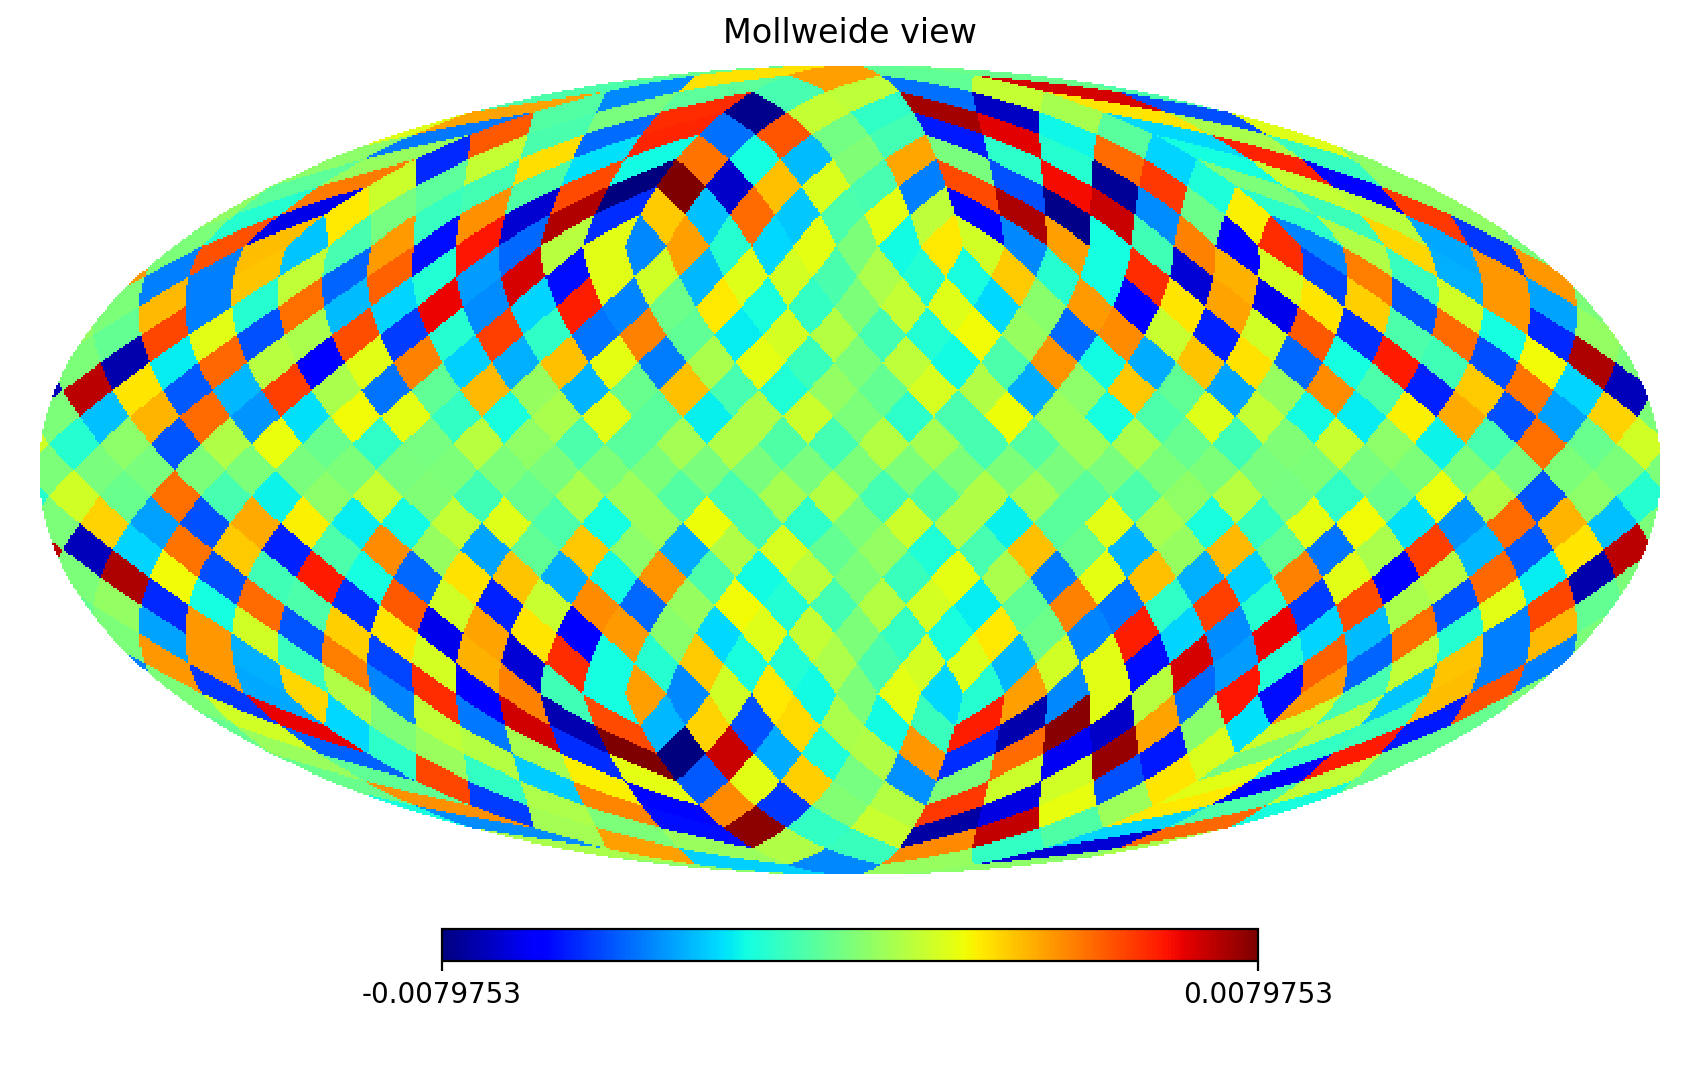

<IPython.core.display.Javascript object>


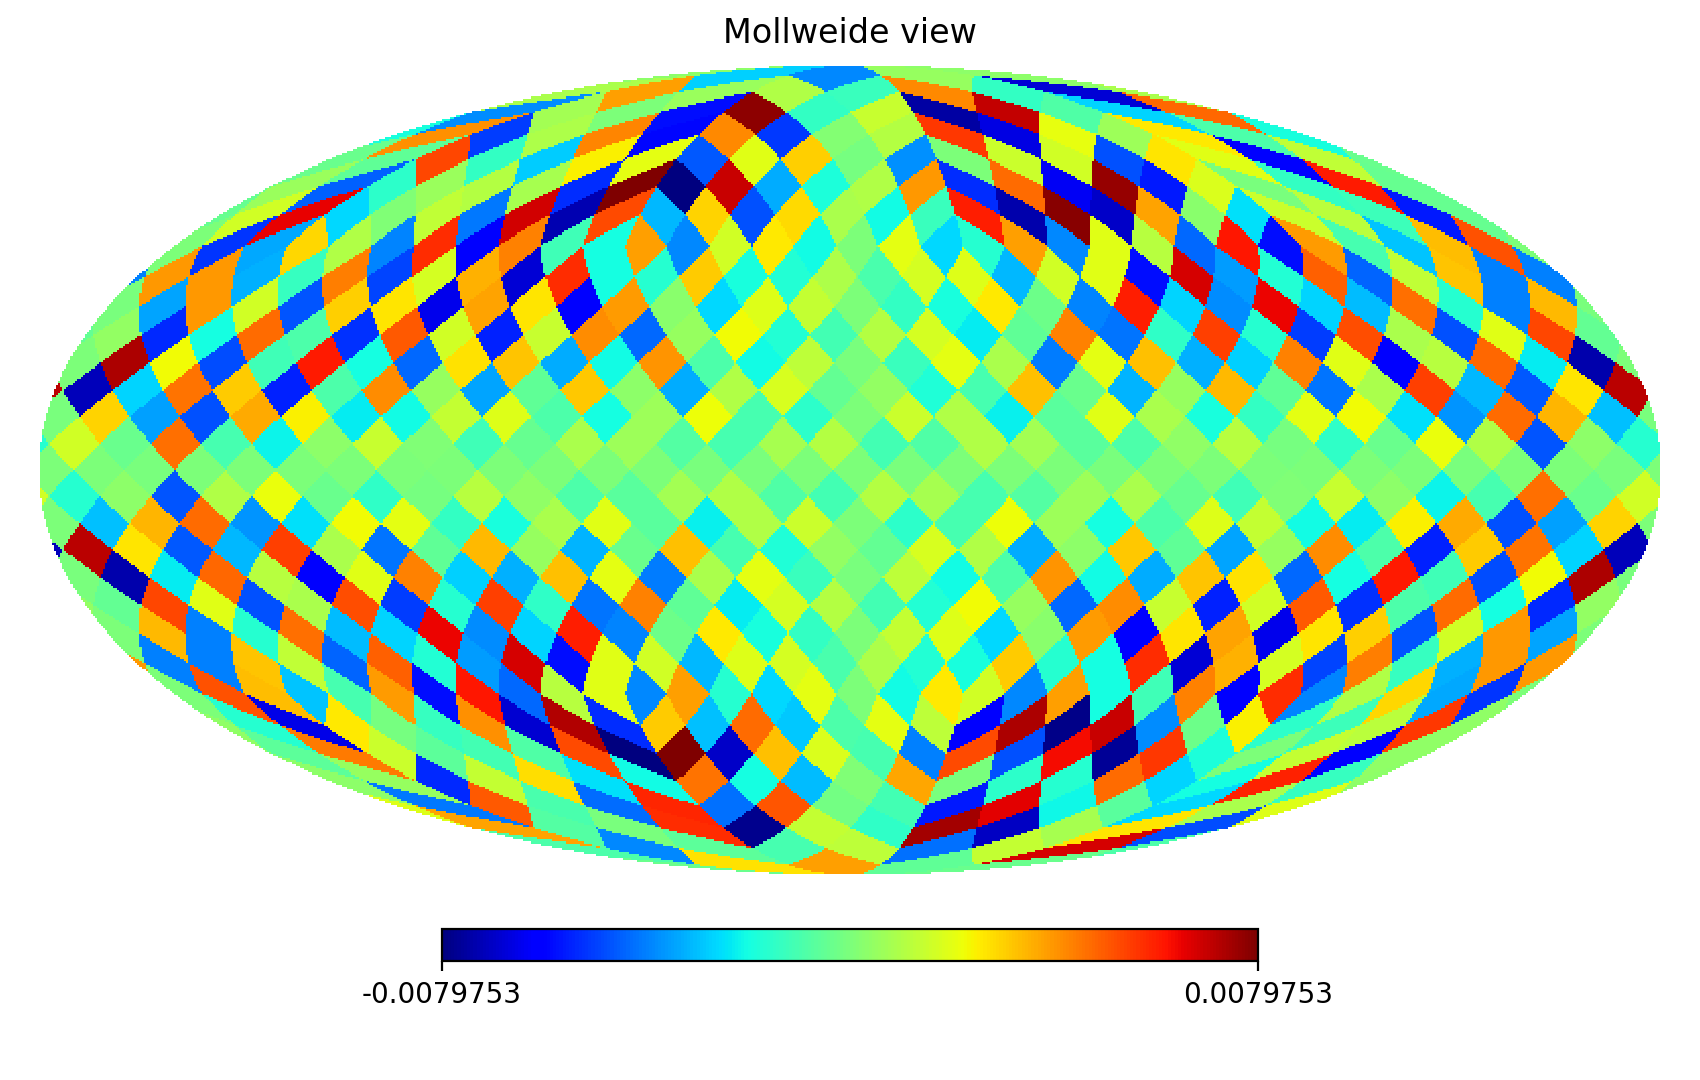

In [43]:
h.mollview(acrtqu[1],rot=(lon,lat))
h.mollview(acctqu[1],rot=(lon,lat))
h.mollview(bltqu[2],rot=(lon,lat))
h.mollview(iker[1],rot=(lon,lat))